# Stock Price Prediction Using LSTM

#### importing Libraries

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split
# from pandas.plotting import register_matplotlib_converters

%matplotlib inline
%config InlineBackend.figure_format='retina'

# register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 22, 10

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

#### Reading Data

In [2]:
df = pd.read_csv('GOOGL.csv',parse_dates=['Date'], 
  index_col="Date")

In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-05-22,198.528534,199.524521,196.196198,196.946945,196.946945,3433700
2009-05-26,196.171173,202.702698,195.195190,202.382385,202.382385,6202700
2009-05-27,203.023026,206.136139,202.607605,202.982986,202.982986,6062500
2009-05-28,204.544540,206.016022,202.507507,205.405411,205.405411,5332200
2009-05-29,206.261261,208.823822,205.555557,208.823822,208.823822,5291100


In [4]:
df.shape

(2335, 6)

In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2.335000e+03
mean,550.725409,555.136744,545.908515,550.662757,550.662757,3.764886e+06
std,278.136894,280.349025,275.855161,278.228484,278.228484,2.764696e+06
min,196.171173,199.524521,195.195190,196.946945,196.946945,5.206000e+05
25%,299.286773,301.759247,297.197204,299.144135,299.144135,1.734650e+06
50%,526.211182,532.780029,521.909973,527.767761,527.767761,3.250200e+06
75%,757.760010,763.745025,752.024994,758.524993,758.524993,4.891800e+06
max,1289.119995,1291.439941,1263.000000,1285.500000,1285.500000,2.961990e+07


#### Plotting Closing price over the years

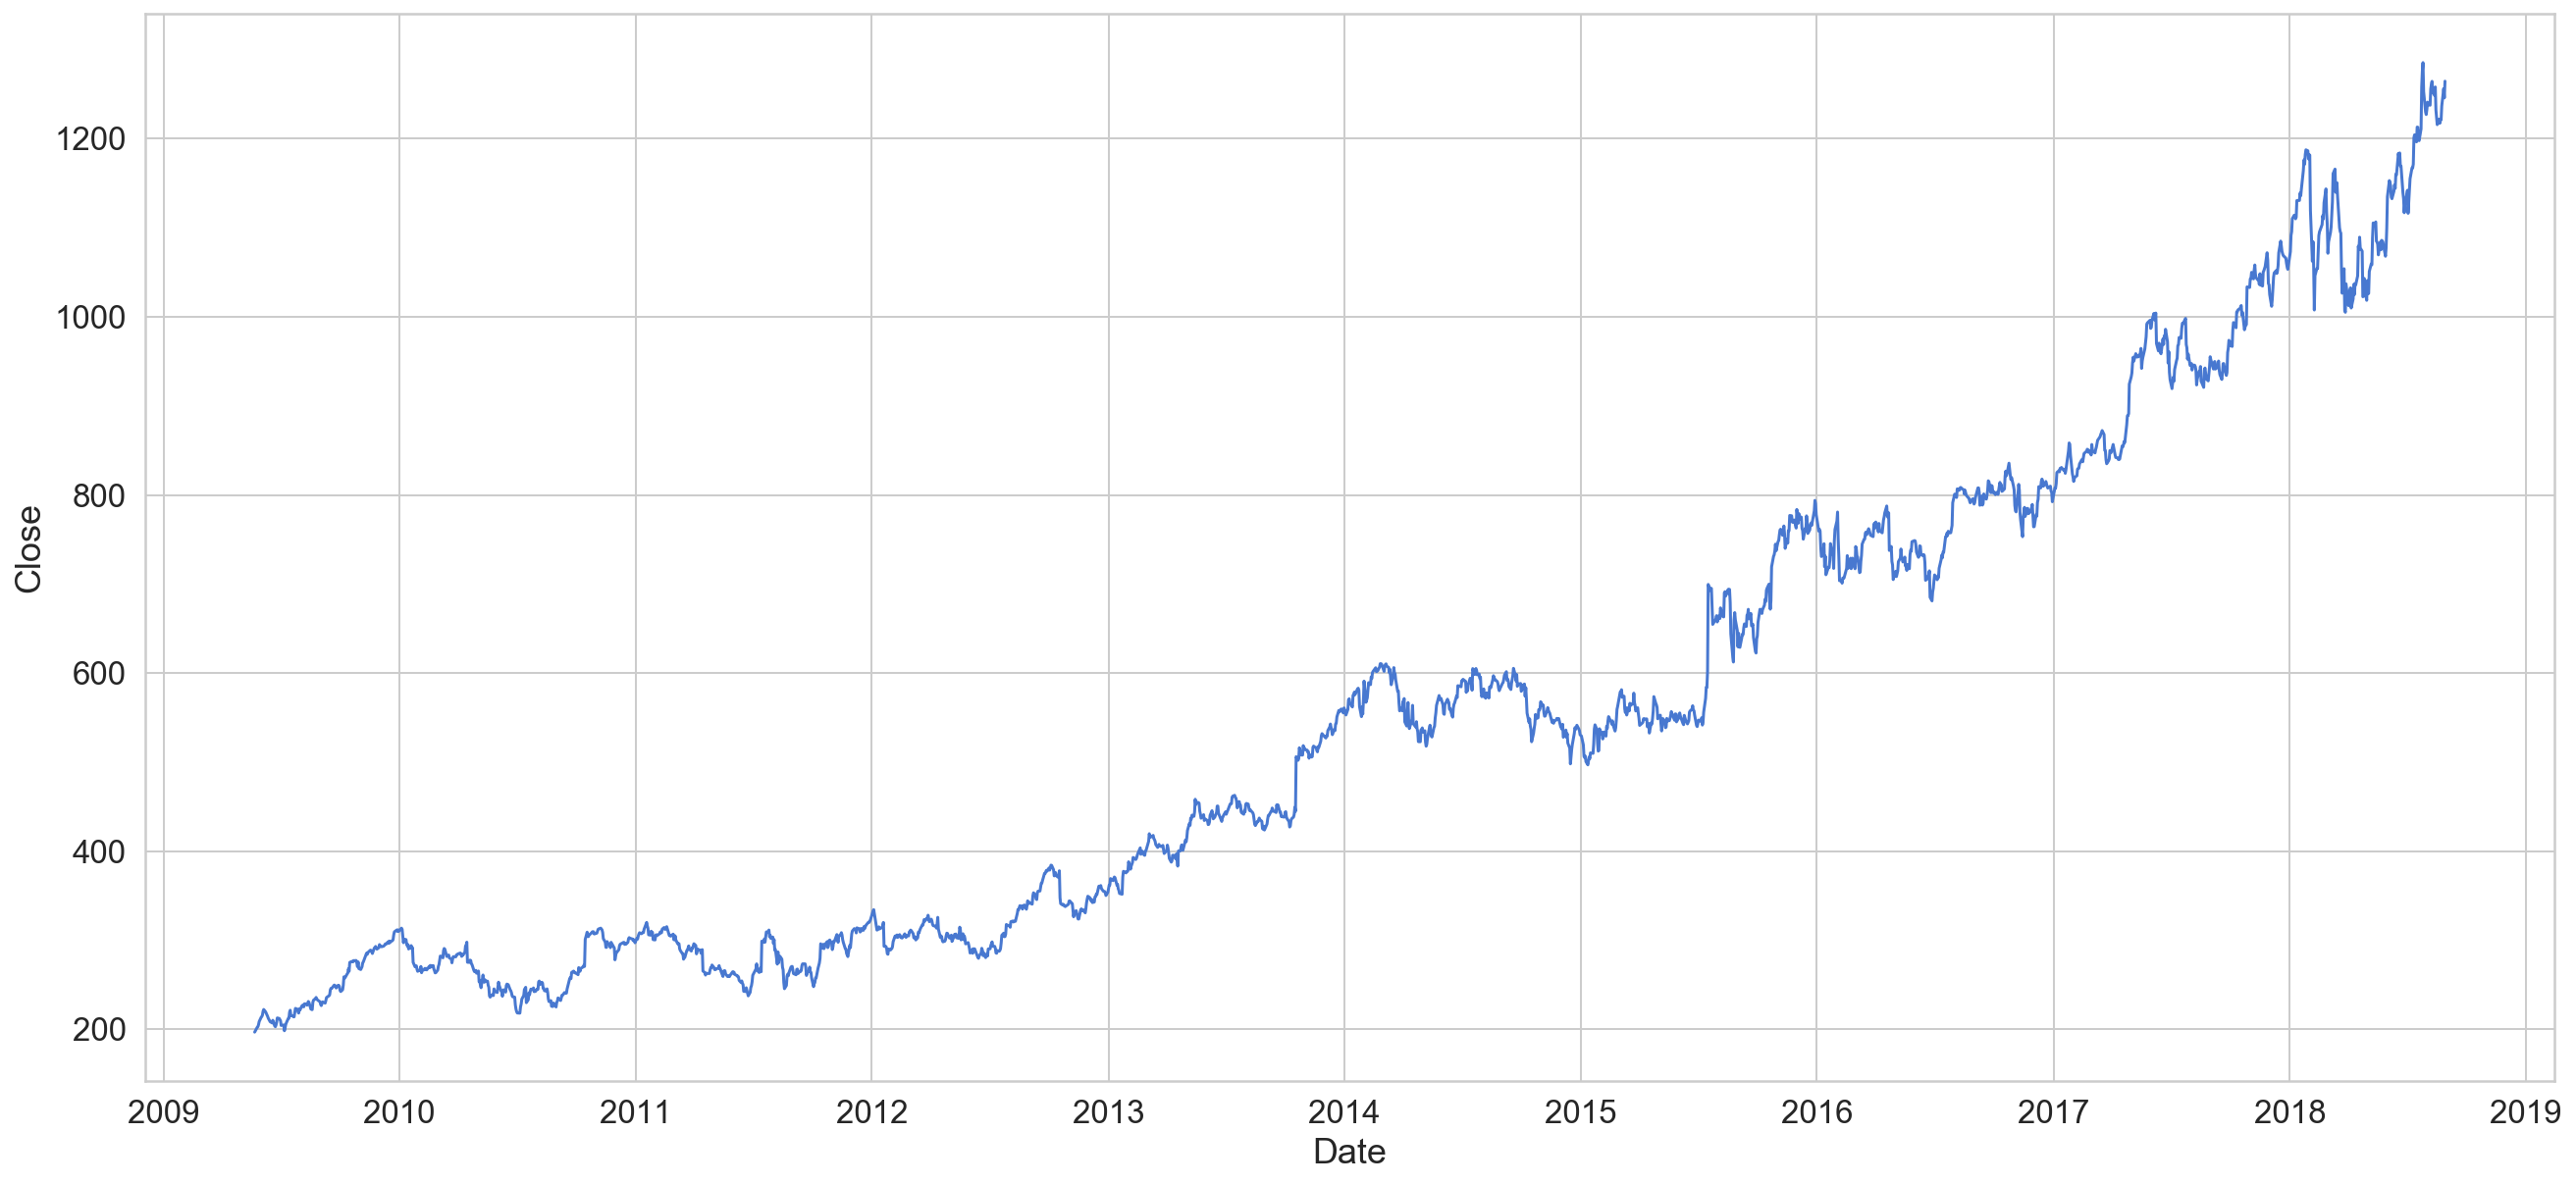

In [6]:
sns.lineplot(x=df.index, y="Close", data=df);

#### Plotting Volume over the Years

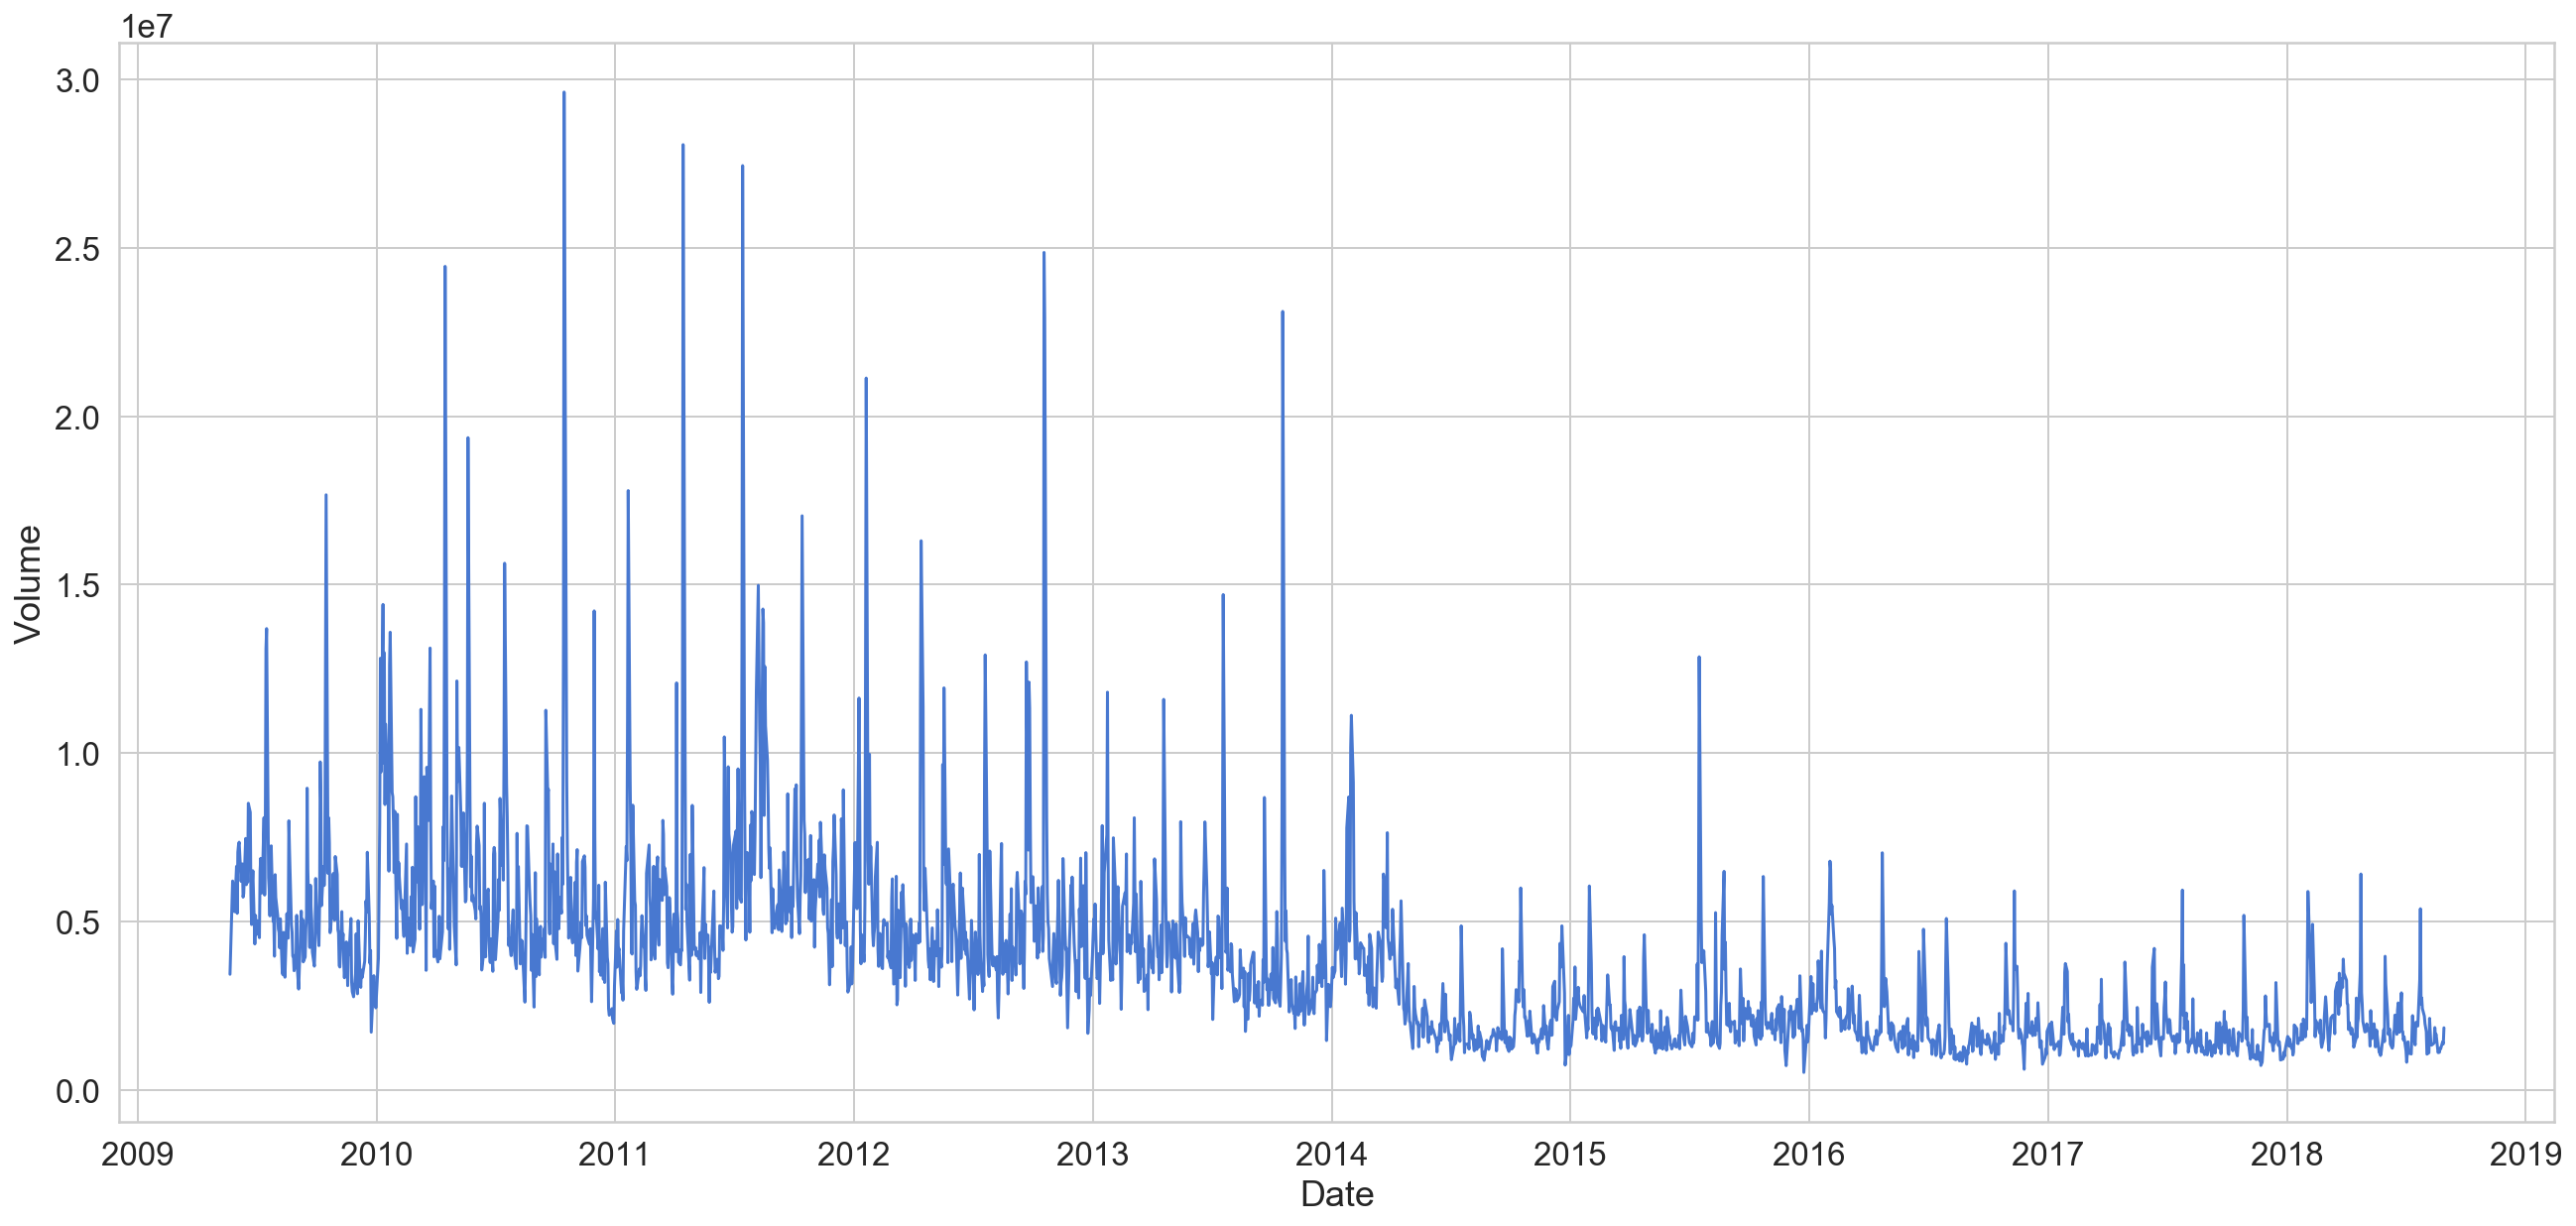

In [7]:
sns.lineplot(x=df.index, y="Volume", data=df);

## Predicting Closing Price using LSTM

In [8]:
#Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .8 ))

print(training_data_len)

1868


In [9]:
data.head()

,Close
Date,
2009-05-22,196.946945
2009-05-26,202.382385
2009-05-27,202.982986
2009-05-28,205.405411
2009-05-29,208.823822


#### Standardizing Data

In [10]:
#Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.        ],
       [0.00499327],
       [0.00554501],
       ...,
       [0.97314786],
       [0.96358467],
       [0.98084616]])

#### Creating Training Data

In [11]:
train_data = scaled_data[0:int(training_data_len), :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []
step_size=60 #it means that the LSTM will look into the past 60 values to estimate closing price 

for i in range(step_size, len(train_data)):
    x_train.append(train_data[i-step_size:i, 0])
    y_train.append(train_data[i, 0])
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

In [12]:
print(x_train.shape,y_train.shape)

(1808, 60, 1) (1808,)


#### Fitting the LSTM model 

In [13]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=False, input_shape= (x_train.shape[1], 1)))
model.add(Dropout(rate = 0.1))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
history = model.fit(x_train, y_train, batch_size=16, validation_split = 0.1, epochs=10)

Epoch 1/10
102/102 [==============================] - 4s 39ms/step - loss: 0.0046 - val_loss: 3.0677e-04
Epoch 2/10
102/102 [==============================] - 3s 31ms/step - loss: 4.5421e-04 - val_loss: 2.8522e-04
Epoch 3/10
102/102 [==============================] - 3s 33ms/step - loss: 4.1735e-04 - val_loss: 2.7201e-04
Epoch 4/10
102/102 [==============================] - 3s 30ms/step - loss: 4.0146e-04 - val_loss: 4.6147e-04
Epoch 5/10
102/102 [==============================] - 3s 31ms/step - loss: 3.4669e-04 - val_loss: 2.6524e-04
Epoch 6/10
102/102 [==============================] - 3s 31ms/step - loss: 3.8311e-04 - val_loss: 2.2241e-04
Epoch 7/10
102/102 [==============================] - 3s 32ms/step - loss: 3.5087e-04 - val_loss: 4.2003e-04
Epoch 8/10
102/102 [==============================] - 4s 35ms/step - loss: 2.7176e-04 - val_loss: 2.7618e-04
Epoch 9/10
102/102 [==============================] - 3s 33ms/step - loss: 3.2366e-04 - val_loss: 4.4539e-04
Epoch 10/10
102/102 [==

#### Visualizing Loss

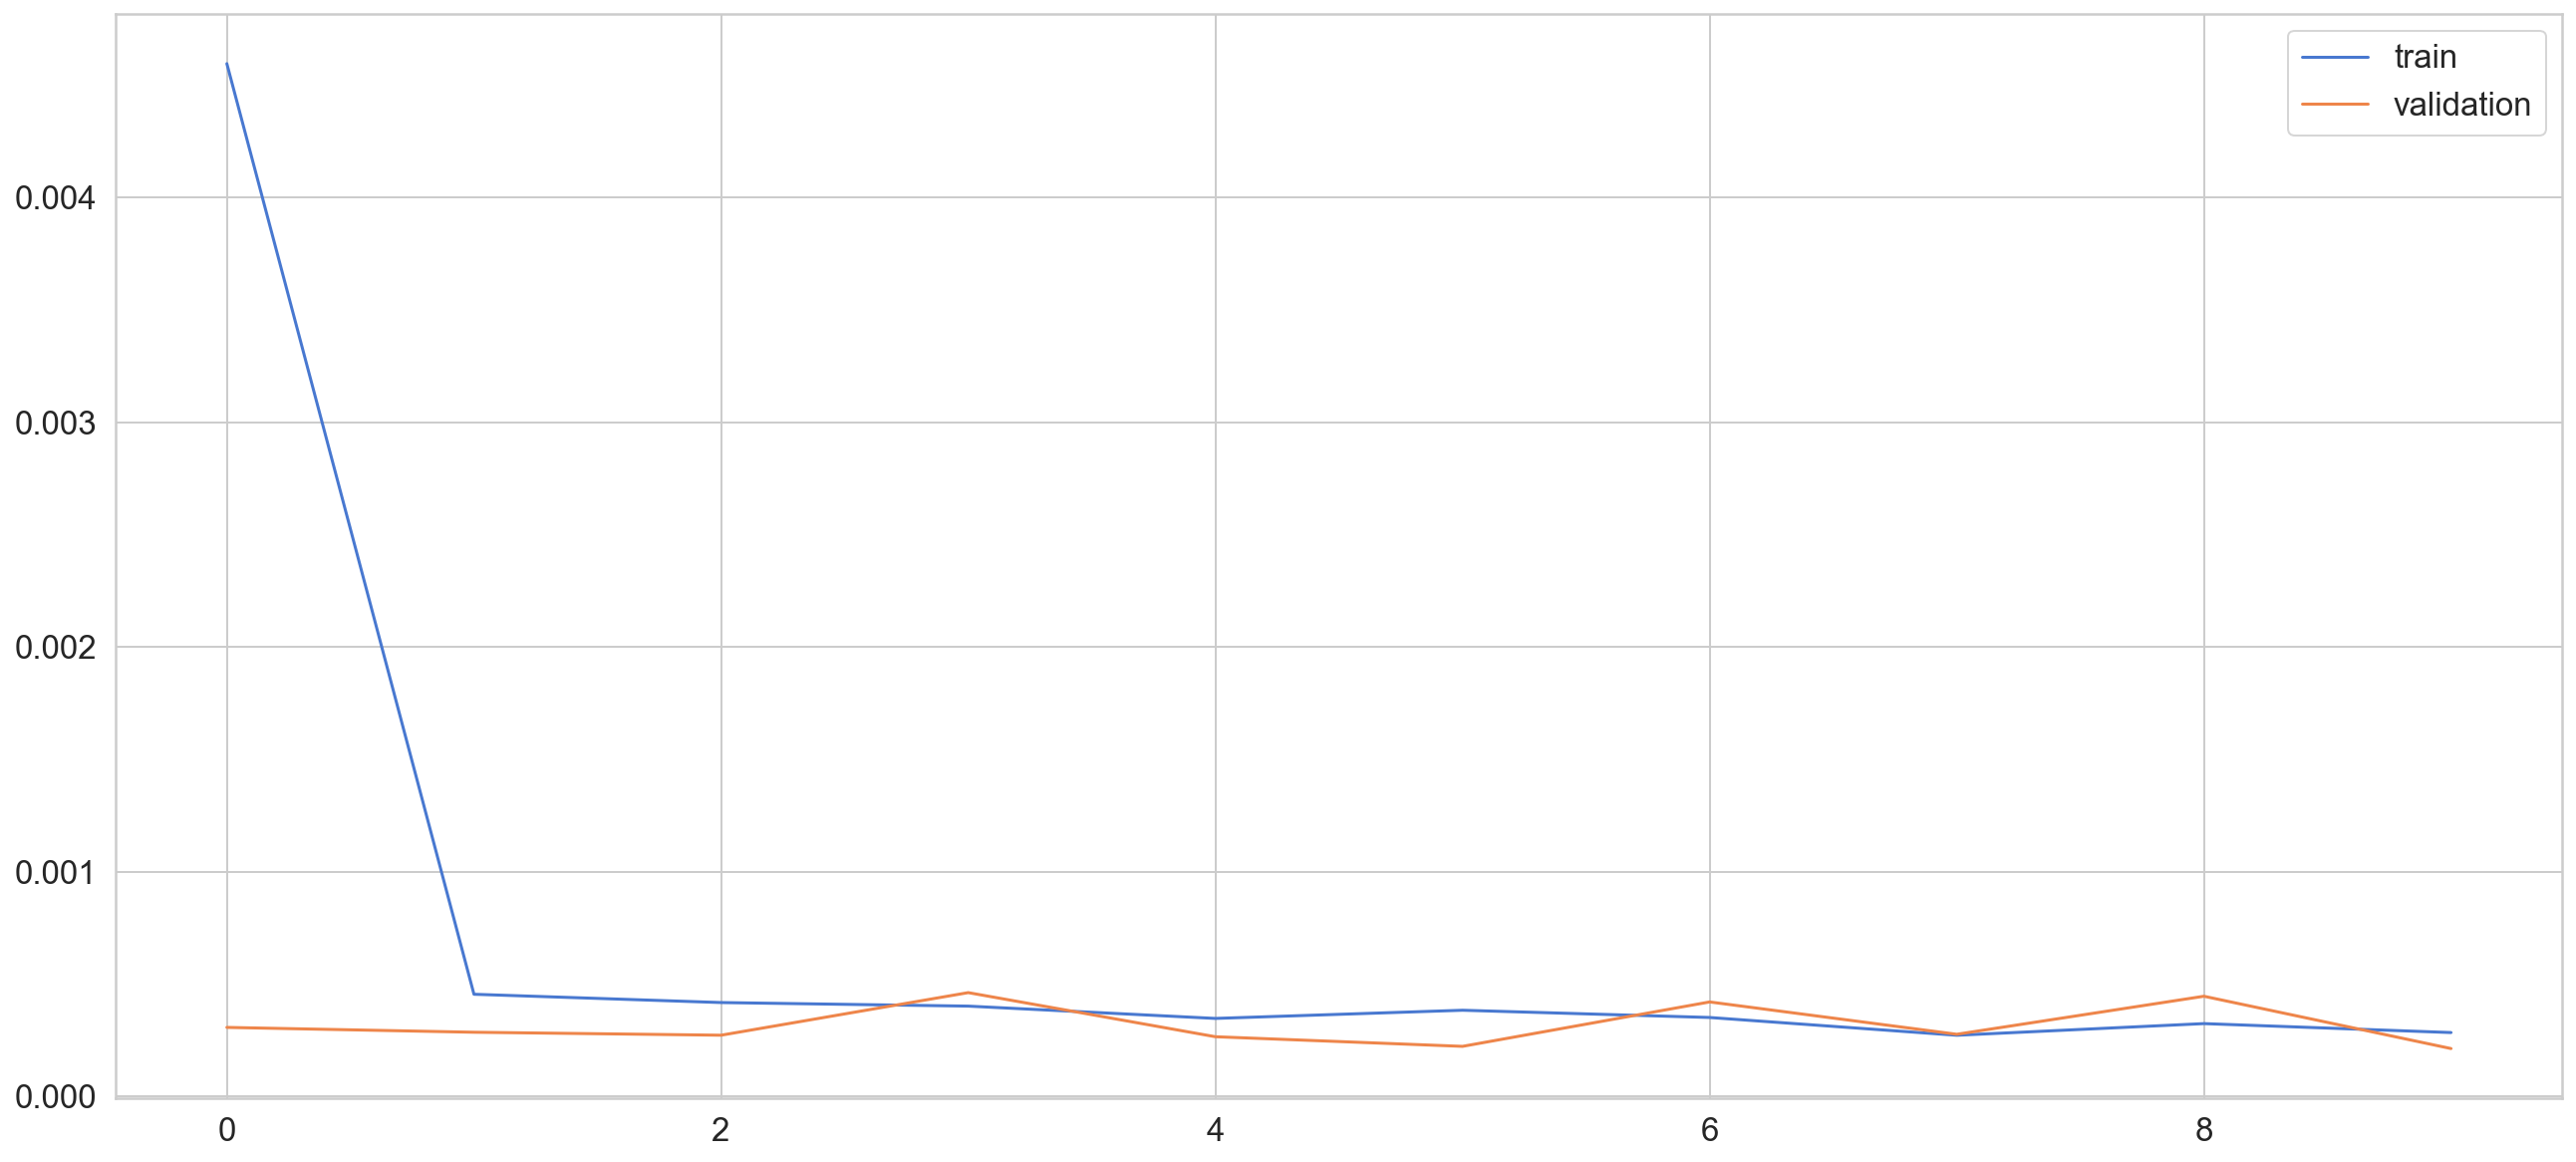

In [14]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend();

#### Creating Test Data

In [15]:
#Create the testing data set
test_data = scaled_data[training_data_len - step_size: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(step_size, len(test_data)):
    x_test.append(test_data[i-step_size:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

#### Predict on test data

In [16]:
# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [17]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print(rmse)

24.641479428732286


In [18]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

c:\users\mango\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [19]:
valid.head()

,Close,Predictions
Date,,
2016-10-21,824.059998,818.863342
2016-10-24,835.739990,821.443726
2016-10-25,828.549988,825.259949
2016-10-26,822.099976,828.100830
2016-10-27,817.349976,829.632812


#### Visualizing Predictions

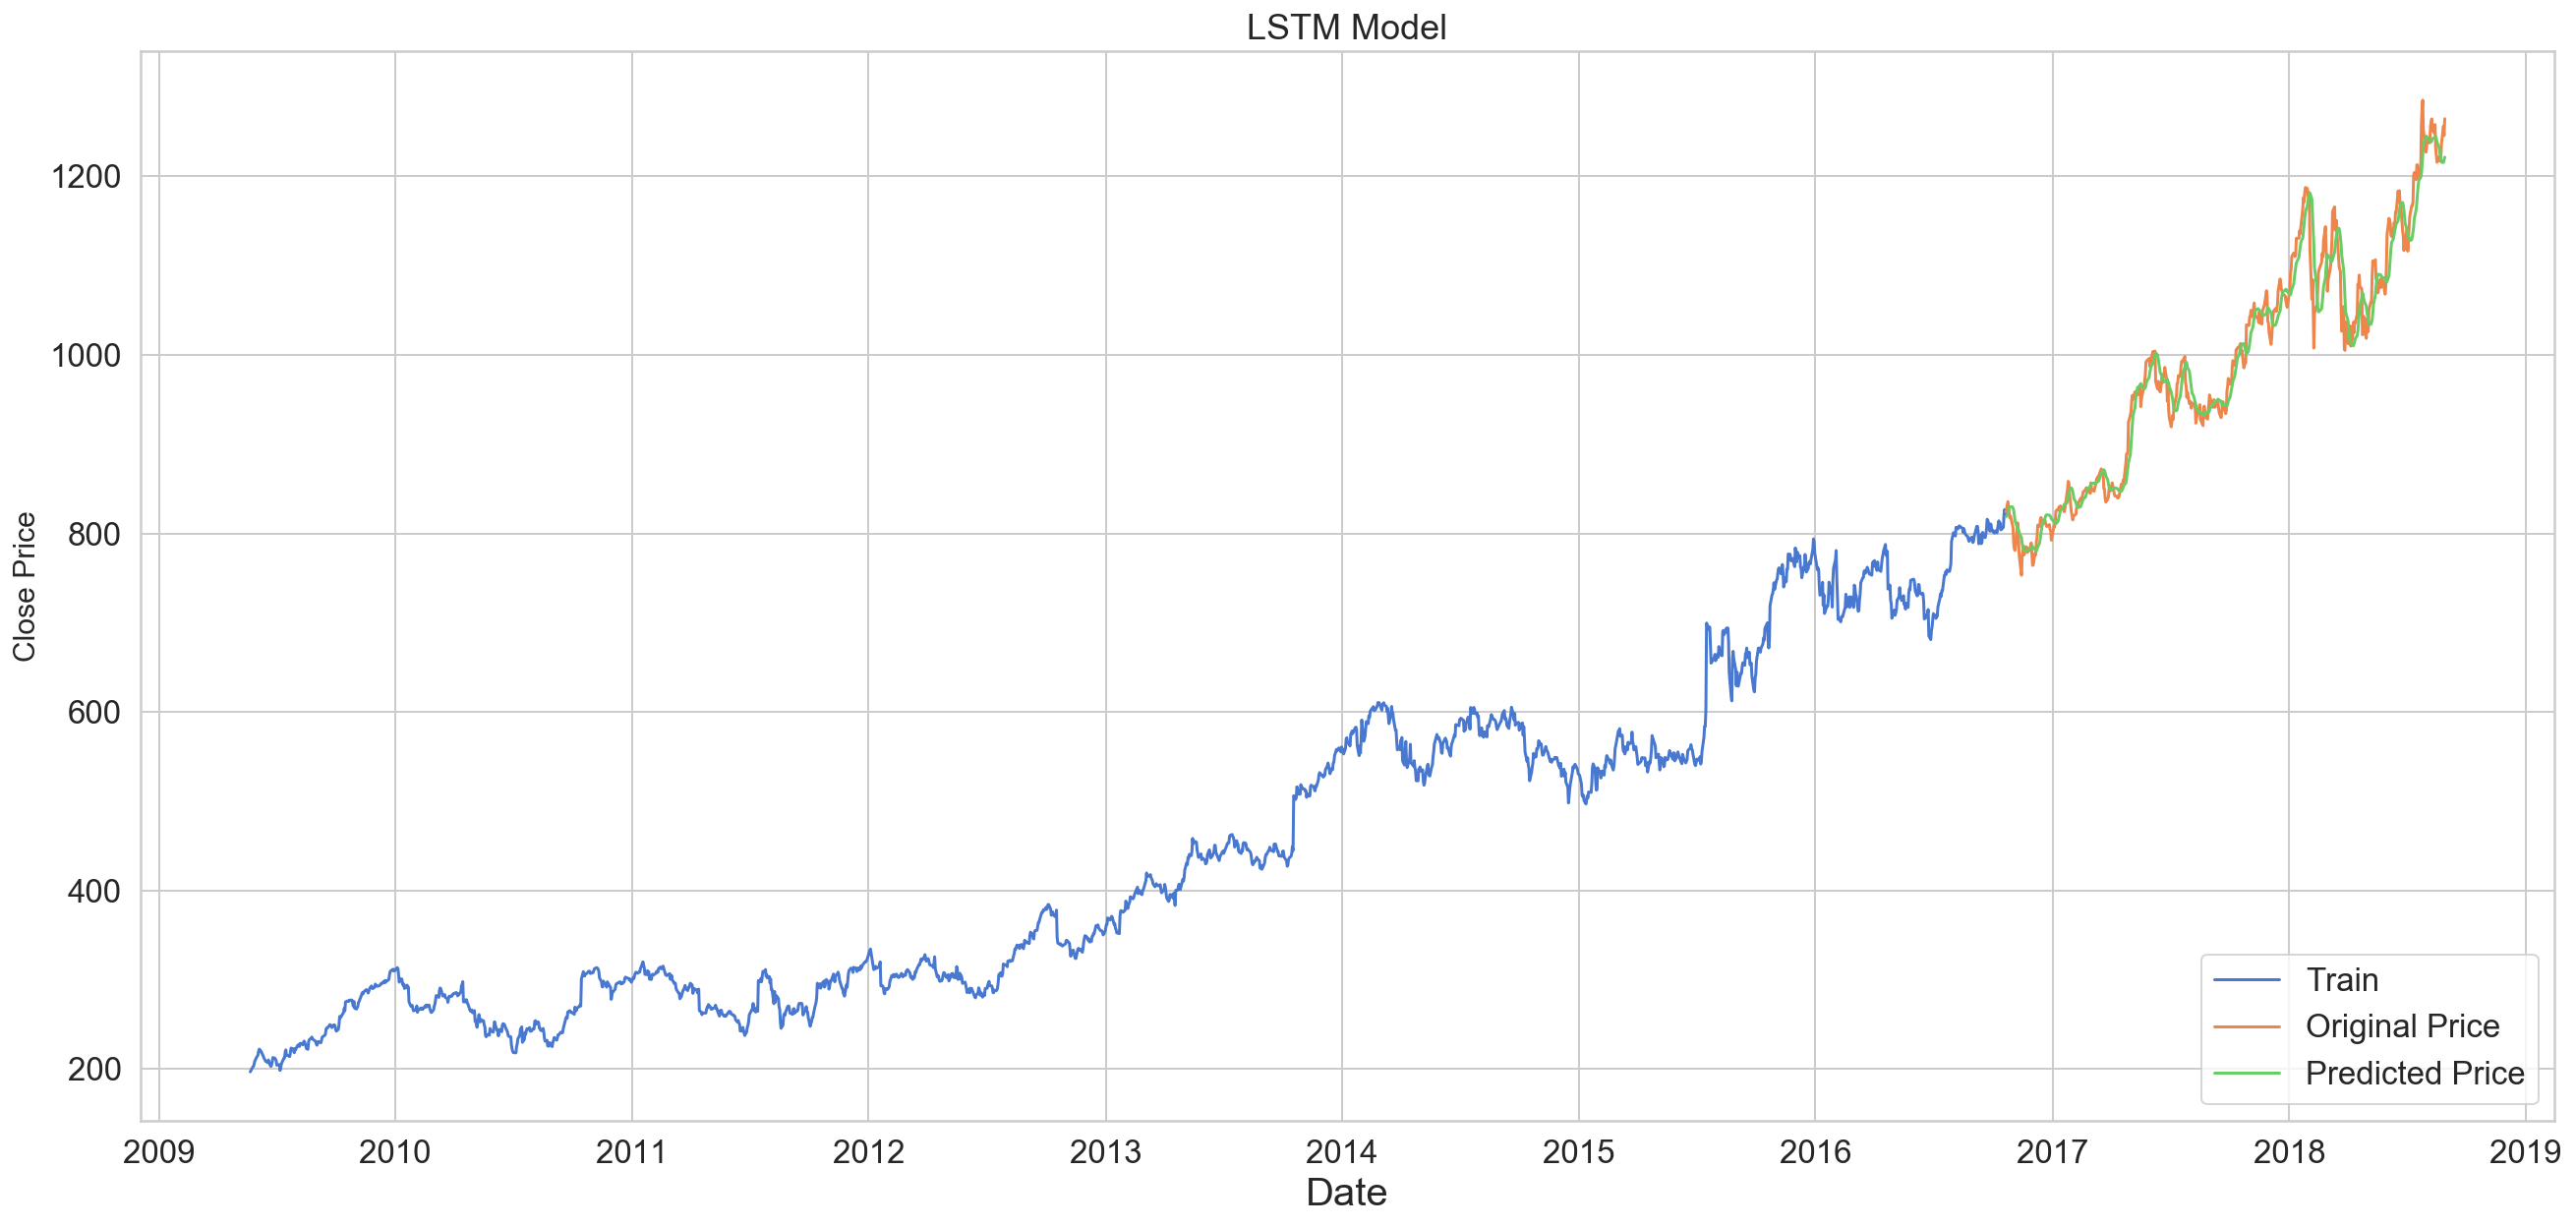

In [20]:
# Visualize the data
plt.title('LSTM Model')
plt.xlabel('Date', fontsize=20)
plt.ylabel('Close Price', fontsize=15)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Original Price', 'Predicted Price'], loc='lower right')
plt.show()

#### Making Bidirectional LSTM model

In [21]:
from keras.layers import Bidirectional
#Build the LSTM model
bimodel = Sequential()
bimodel.add(Bidirectional(LSTM(60, return_sequences=False, input_shape= (x_train.shape[1], 1))))
bimodel.add(Dropout(rate = 0.2))
bimodel.add(Dense(1))

# Compile the model
bimodel.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
history = bimodel.fit(x_train, y_train, batch_size=16, validation_split = 0.1, epochs=10)

Epoch 1/10
102/102 [==============================] - 6s 59ms/step - loss: 0.0023 - val_loss: 0.0022
Epoch 2/10
102/102 [==============================] - 4s 39ms/step - loss: 7.2354e-04 - val_loss: 9.0170e-04
Epoch 3/10
102/102 [==============================] - 4s 38ms/step - loss: 5.0780e-04 - val_loss: 4.7348e-04
Epoch 4/10
102/102 [==============================] - 4s 44ms/step - loss: 5.1159e-04 - val_loss: 3.7509e-04
Epoch 5/10
102/102 [==============================] - 4s 42ms/step - loss: 4.1403e-04 - val_loss: 4.8464e-04
Epoch 6/10
102/102 [==============================] - 5s 51ms/step - loss: 4.1369e-04 - val_loss: 3.0122e-04
Epoch 7/10
102/102 [==============================] - 5s 49ms/step - loss: 3.8063e-04 - val_loss: 4.6315e-04
Epoch 8/10
102/102 [==============================] - 4s 39ms/step - loss: 3.8037e-04 - val_loss: 2.5248e-04
Epoch 9/10
102/102 [==============================] - 5s 44ms/step - loss: 3.9375e-04 - val_loss: 4.3260e-04
Epoch 10/10
102/102 [======

In [22]:
#### Visualizing loss

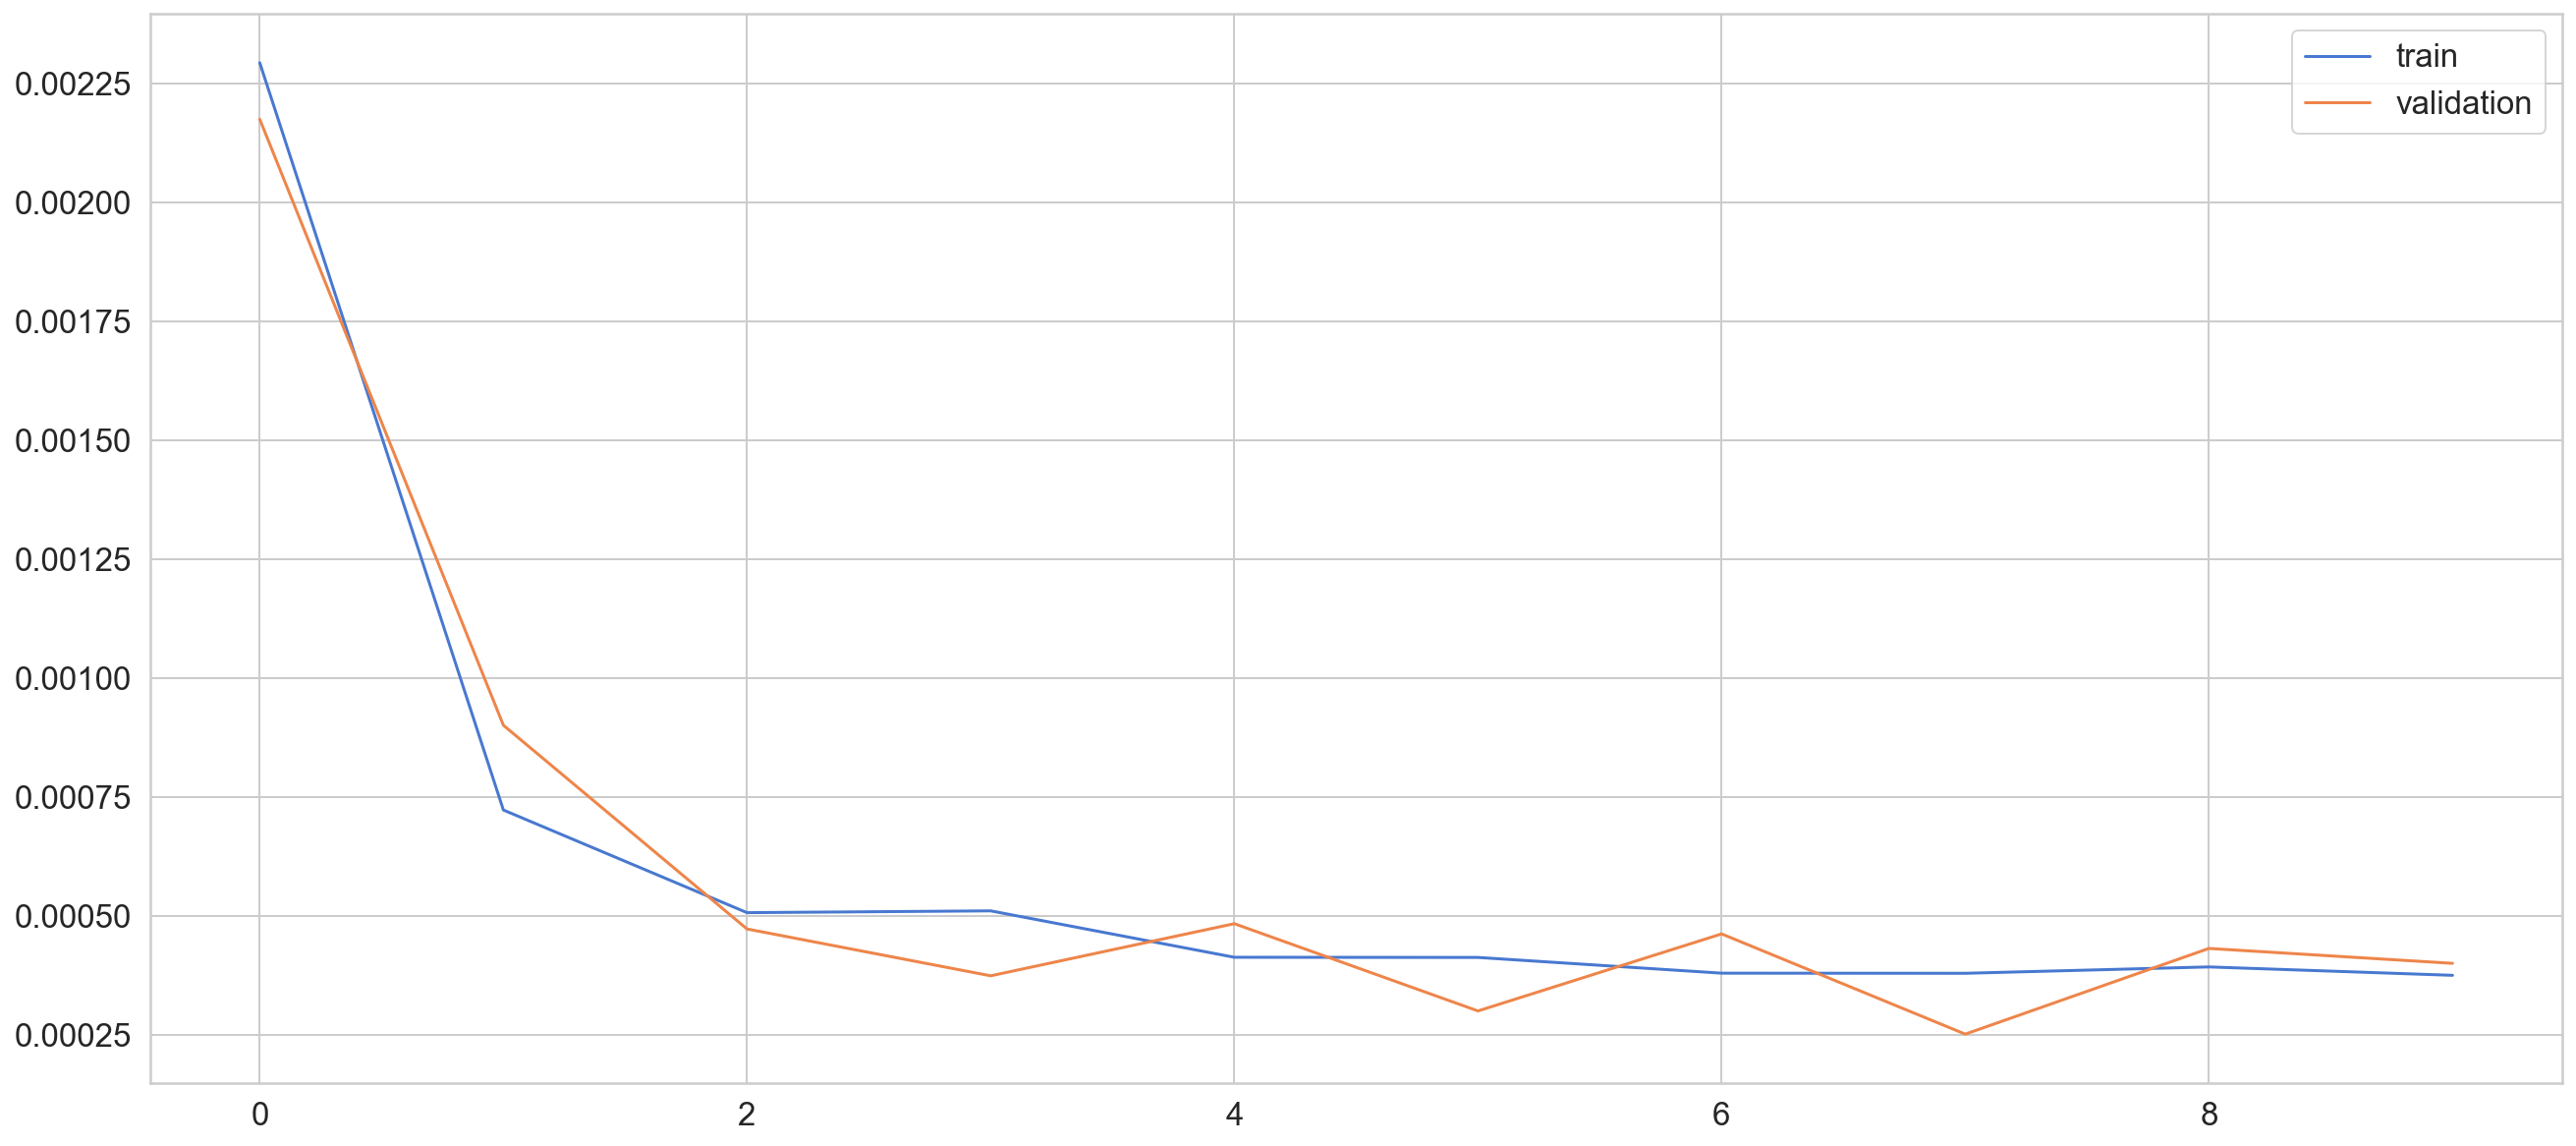

In [23]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend();

In [24]:
# Get the models predicted price values 
bilstmpredictions = bimodel.predict(x_test)
bilstmpredictions = scaler.inverse_transform(bilstmpredictions)

In [25]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((bilstmpredictions - y_test) ** 2)))
print(rmse)

31.971722986087354


In [26]:
train = data[:training_data_len]
bilstmvalid = data[training_data_len:]
bilstmvalid['Predicted'] = bilstmpredictions

c:\users\mango\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [27]:
bilstmvalid.head()

,Close,Predicted
Date,,
2016-10-21,824.059998,830.824951
2016-10-24,835.739990,834.810120
2016-10-25,828.549988,839.035461
2016-10-26,822.099976,842.089294
2016-10-27,817.349976,843.908630


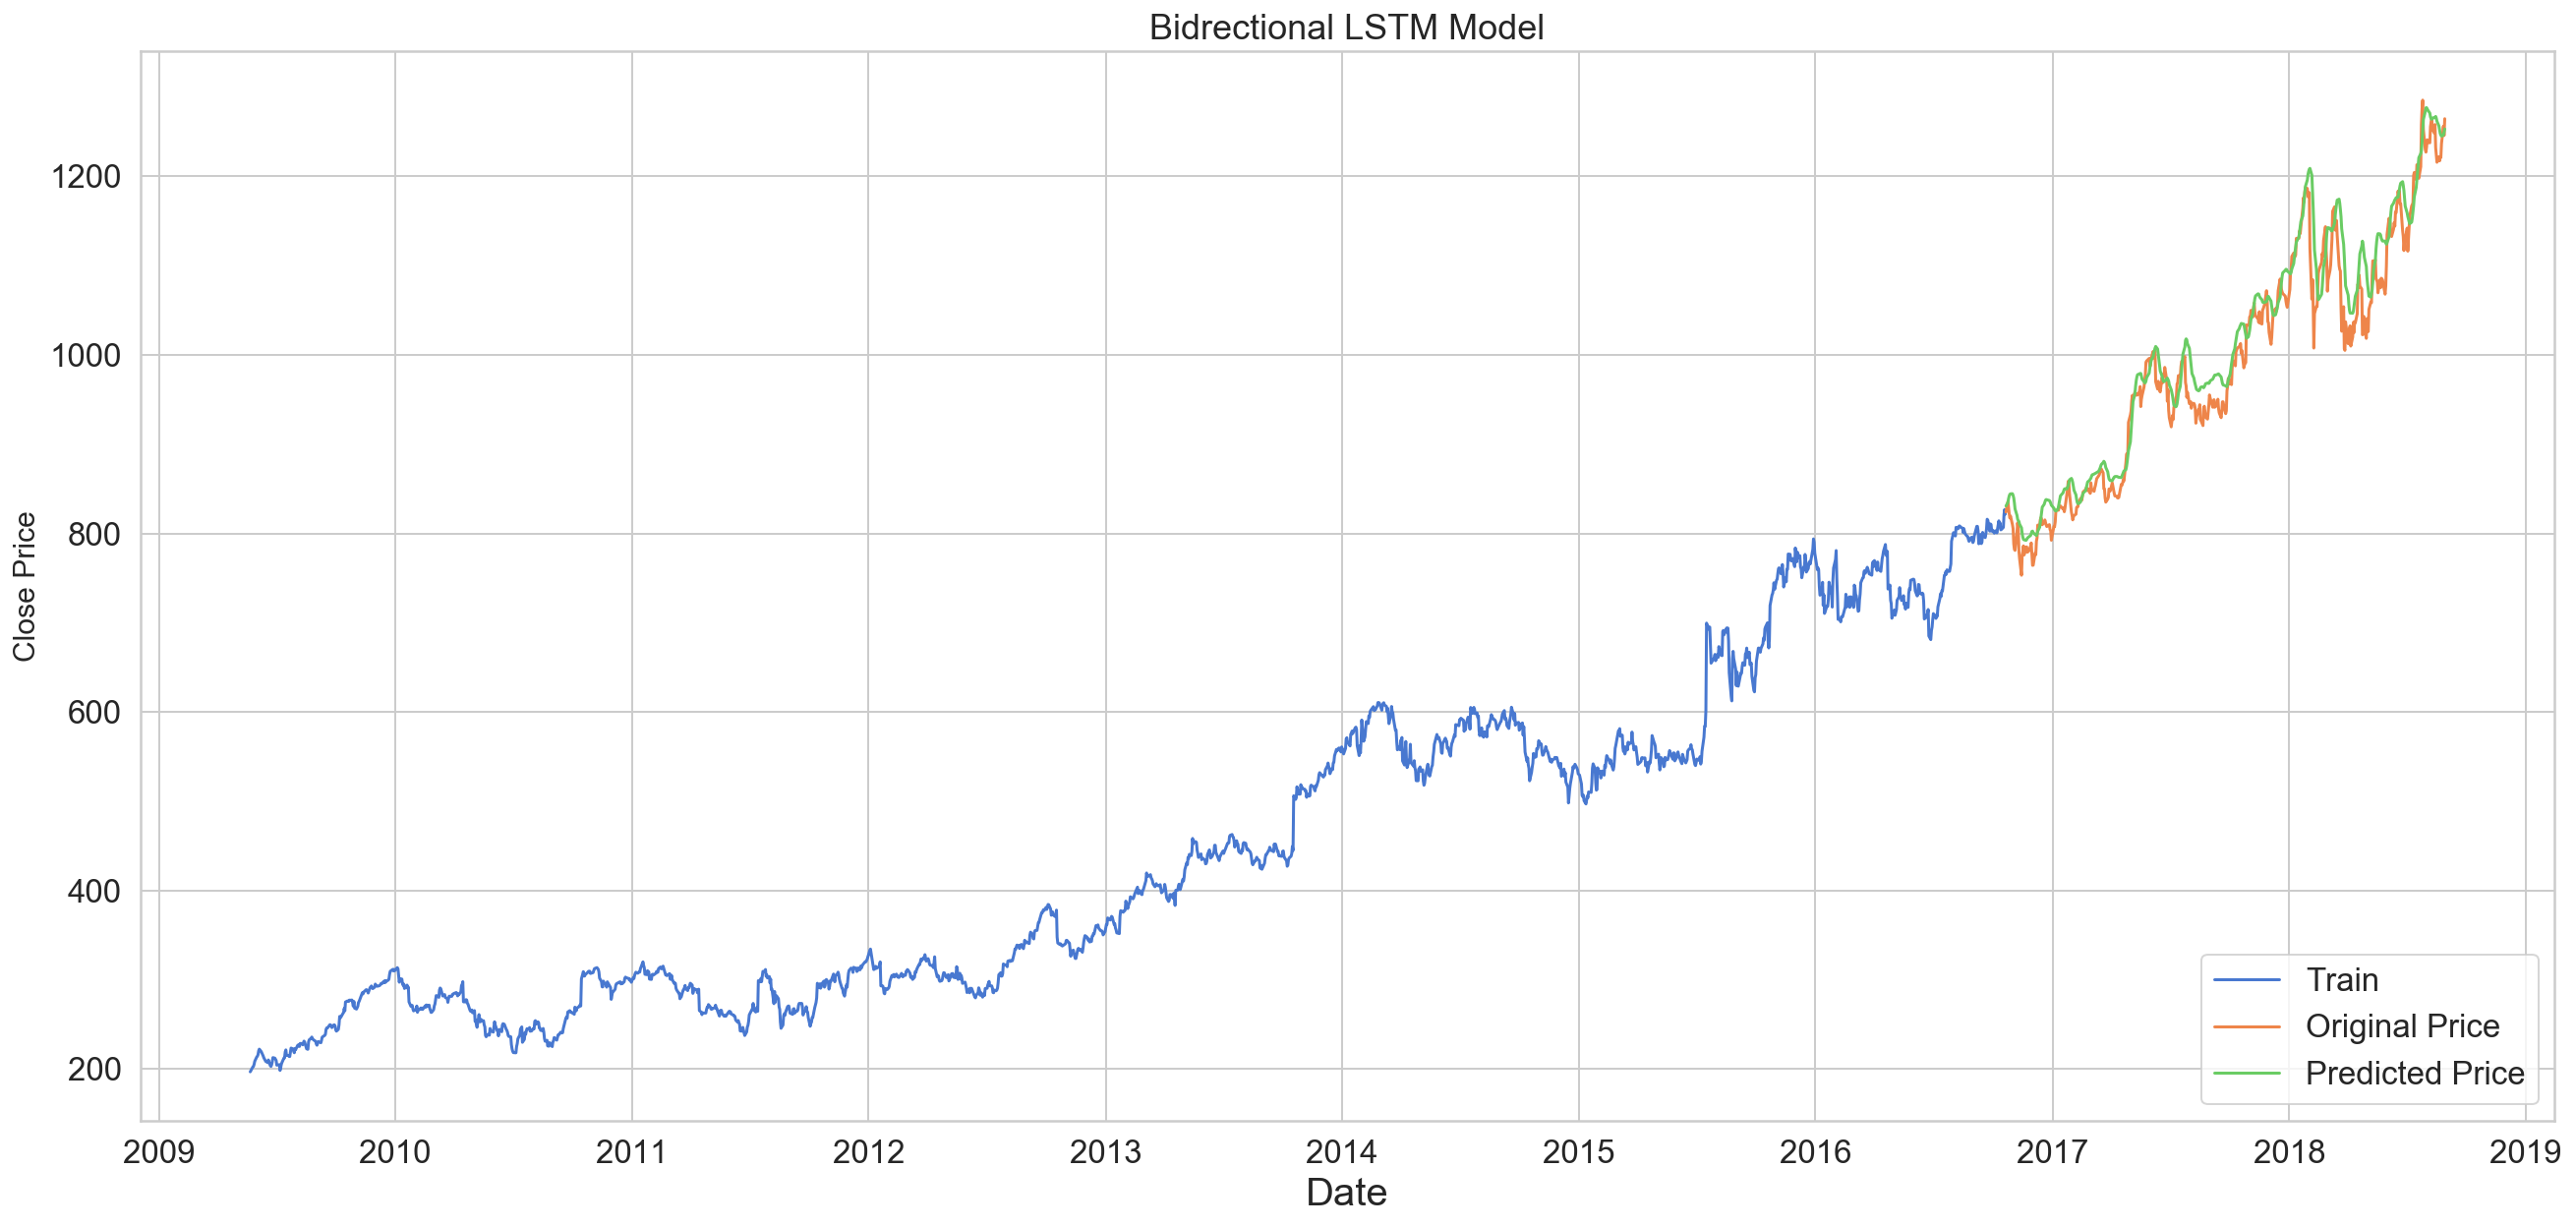

In [29]:
# Visualize the data
plt.title('Bidrectional LSTM Model')
plt.xlabel('Date', fontsize=20)
plt.ylabel('Close Price', fontsize=15)
plt.plot(train['Close'])
plt.plot(bilstmvalid[['Close', 'Predicted']])
plt.legend(['Train', 'Original Price', 'Predicted Price'], loc='lower right')
plt.show()